# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

**Business Goal**

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [21]:
# Let's import all the necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

### Importing data

In [22]:
# reading the CSV file into pandas dataframe
housing_df = pd.read_csv("train.csv")

### EDA

In [23]:
# Check top few records to get a feel of the data structure
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Dropping Variables wichh doesn't help towards Model Prediction

 id variable can be dropped as it is just a row identifier

In [24]:
# drop the instant, dteday, casual, registered columns as they doesn't help towards model predictions
housing_df = housing_df.drop(['Id'], axis=1)

#### Quick inspection of Data and Variables

In [19]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


dataset contains 1460 observations with 80 variables.

we can observe some NAN value columns, which we can remove/imputer

going by the data dictonary and comparing with above output, we can observe that there are few Categorical variables which are indicated with wrong datatype, we will ned to convert them accordingly. 

#### Missing Value Check

In [41]:
# Are there any missing values ?

housing_df.isnull().sum()[housing_df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There seems to be multiple variables with missing values in the Dataset

We will try to impute the missing vales or remove the variables where atleast 85% of the data is associated to 1 value.

#### Removing/Imputing Missing values in Categorical Variables

In [43]:
# Impute NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_df[col]=housing_df[col].fillna('None')

In [45]:
housing_df.shape

(1460, 80)

In [46]:
# Drop the following columns that have more than 85% values (1460*.85= 1241) associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing_df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housing_df.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,None,0,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,None,0,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,None,0,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,None,0,12,2008,Normal,250000


In [48]:
# check for null values in all categorical columns

housing_df.select_dtypes(include='object').isnull().sum()[housing_df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more NULL values in Categorcial variables

#### Removing/Imputing Missing values in Numerical Variables

In [50]:
# check the null values in the numerical data

housing_df.select_dtypes(include=['int64','float']).isnull().sum()[housing_df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [51]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing_df['LotFrontage'] = housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())

In [53]:
# We would be deriving new feature from GarageYrBlt later, so for now we will set the null values with 0 

housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [54]:
# Drop the following columns that have more than 85% (1460*.85= 1241) values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_df.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_df.drop(['MoSold'], axis = 1, inplace = True)

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2003,RFn,2,548,0,61,None,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,1976,RFn,2,460,298,0,None,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2001,RFn,2,608,0,42,None,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,1998,Unf,3,642,0,35,None,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,2000,RFn,3,836,192,84,None,2008,Normal,250000


#### Feature Engineering - Based on Metadata, we will try to create few new Features helpful for Model Predcitions

In [56]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not
# based on the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_df['IsRemodelled'] = housing_df.apply(checkForRemodel, axis=1)
housing_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,548,0,61,None,2008,Normal,208500,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,RFn,2,460,298,0,None,2007,Normal,181500,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,608,0,42,None,2008,Normal,223500,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Unf,3,642,0,35,None,2006,Abnorml,140000,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,RFn,3,836,192,84,None,2008,Normal,250000,0


In [57]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_df['BuiltOrRemodelAge'] = housing_df.apply(getBuiltOrRemodelAge, axis=1)
housing_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,548,0,61,None,2008,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,460,298,0,None,2007,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,608,0,42,None,2008,Normal,223500,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,642,0,35,None,2006,Abnorml,140000,1,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,836,192,84,None,2008,Normal,250000,0,8


In [58]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt, the values which we have imputed as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_df['OldOrNewGarage'] = housing_df['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2008,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,2007,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,2008,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2006,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,2008,Normal,250000,0,8,1


In [59]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt,
# we can drop these columns as we would only be using the derived columns for further analysis

housing_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [60]:
housing_df.shape

(1460, 48)

In [62]:
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

Series([], dtype: int64)

No more Null values in the Dataset

#### Checking for Duplicates

In [63]:
# Are there any duplicates ?
dups = housing_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [65]:
housing_df.shape

(1460, 48)

No Duplicates found

### Visual Analysis

In [68]:
housing_df.dtypes

MSSubClass             int64
MSZoning              object
LotFrontage          float64
LotArea                int64
LotShape              object
LotConfig             object
Neighborhood          object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond            int64
RoofStyle             object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual             object
Foundation            object
BsmtQual              object
BsmtExposure          object
BsmtFinType1          object
BsmtFinSF1             int64
BsmtUnfSF              int64
TotalBsmtSF            int64
HeatingQC             object
1stFlrSF               int64
2ndFlrSF               int64
GrLivArea              int64
BsmtFullBath           int64
FullBath               int64
HalfBath               int64
BedroomAbvGr           int64
KitchenQual           object
TotRmsAbvGrd           int64
Fireplaces    

#### Outlier Check

In [82]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


In [76]:
housing_df.select_dtypes(include=['int64','float']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

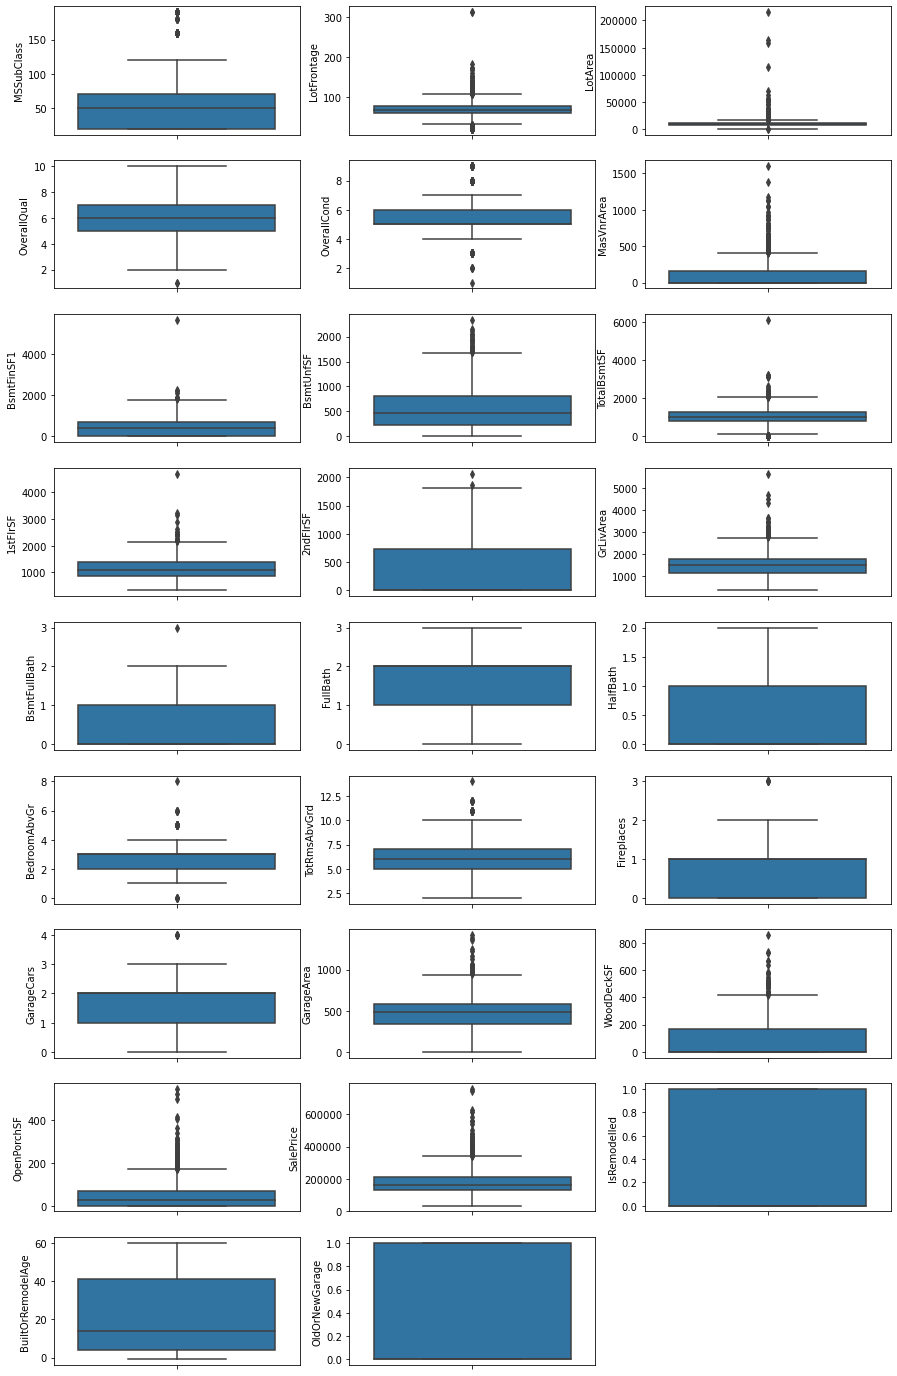

In [80]:
# boxplot for all continuous variables

plt.figure(figsize=(15, 25))
for index,col in enumerate(housing_df.select_dtypes(include=['int64','float']).columns):
    plt.subplot(9,3,index+1)
    sns.boxplot(data=housing_df, y=col)
plt.show()

In [83]:
housing_df.select_dtypes(include=['int64','float']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

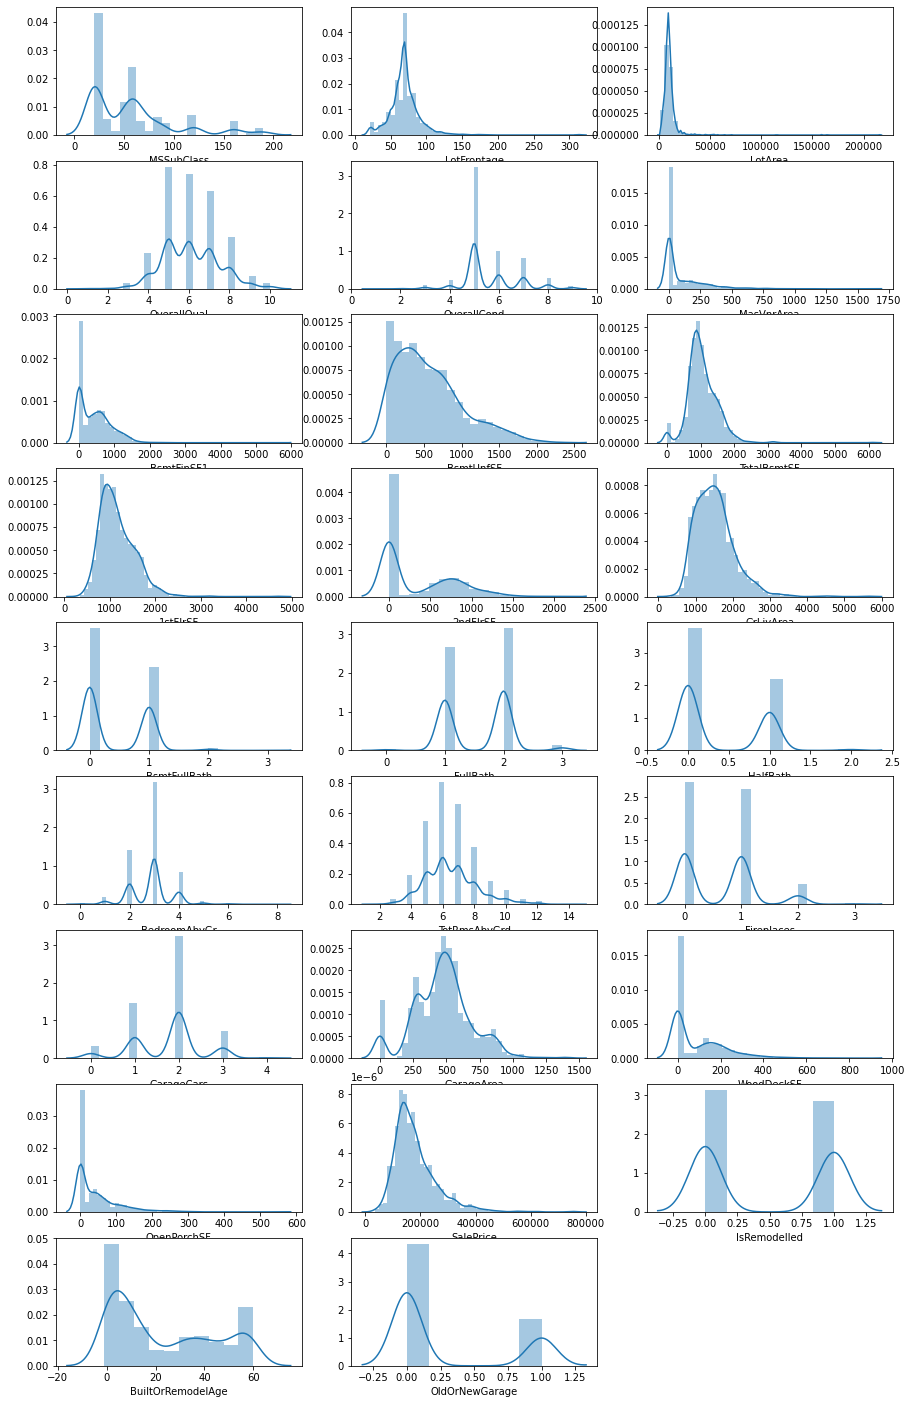

In [81]:
# distplot for all continuous variables

plt.figure(figsize=(15, 25))
for index,col in enumerate(housing_df.select_dtypes(include=['int64','float']).columns):
    plt.subplot(9,3,index+1)
    sns.distplot(housing_df[col])
plt.show()

In [84]:
# Removing Outliers beyond 98% / 99%

# for LotArea

nn_quartile_LotArea = housing_df['LotArea'].quantile(0.98)
housing_df = housing_df[housing_df["LotArea"] < nn_quartile_LotArea]

# for MasVnrArea

nn_quartile_MasVnrArea = housing_df['MasVnrArea'].quantile(0.98)
housing_df = housing_df[housing_df["MasVnrArea"] < nn_quartile_MasVnrArea]

# for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing_df['TotalBsmtSF'].quantile(0.99)
housing_df = housing_df[housing_df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# for WoodDeckSF

nn_quartile_WoodDeckSF = housing_df['WoodDeckSF'].quantile(0.99)
housing_df = housing_df[housing_df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# for OpenPorchSF

nn_quartile_OpenPorchSF = housing_df['OpenPorchSF'].quantile(0.99)
housing_df = housing_df[housing_df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [87]:
# Determine the percentage of data retained

num_data = round(100*(len(housing_df)/1460),2)
print(num_data)

93.01


<Figure size 720x360 with 0 Axes>

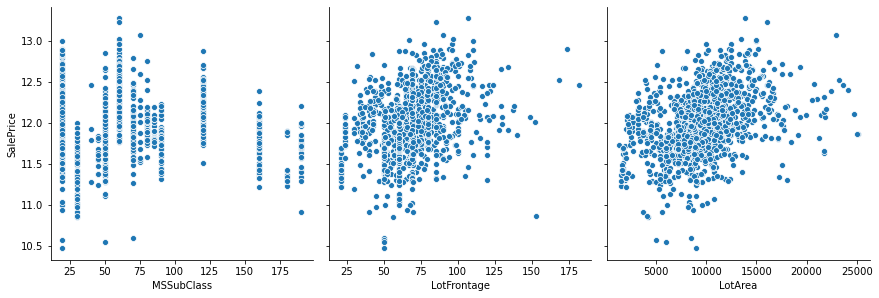

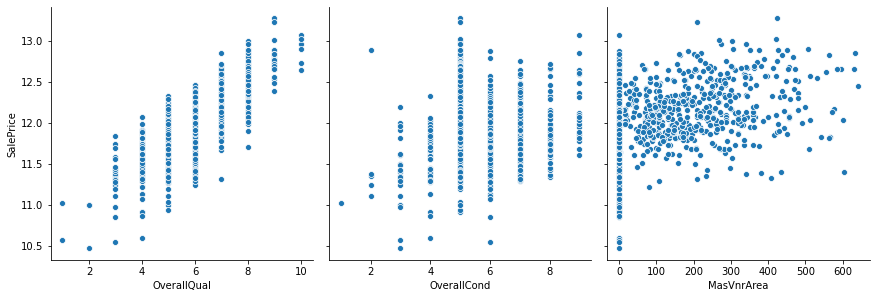

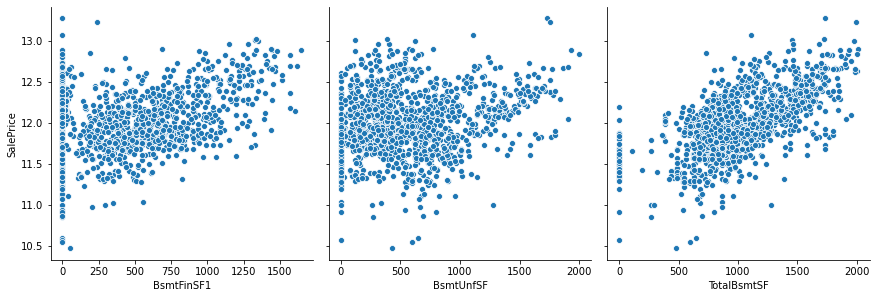

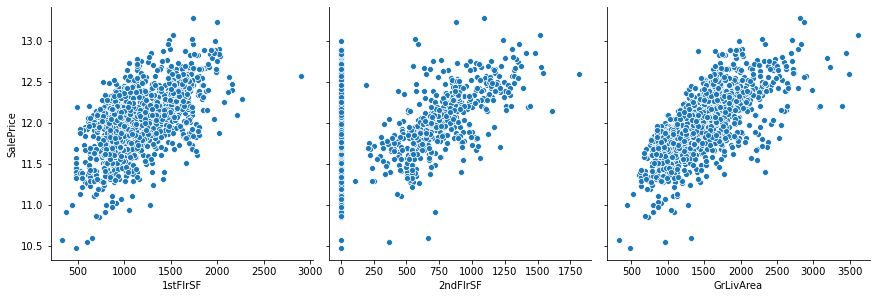

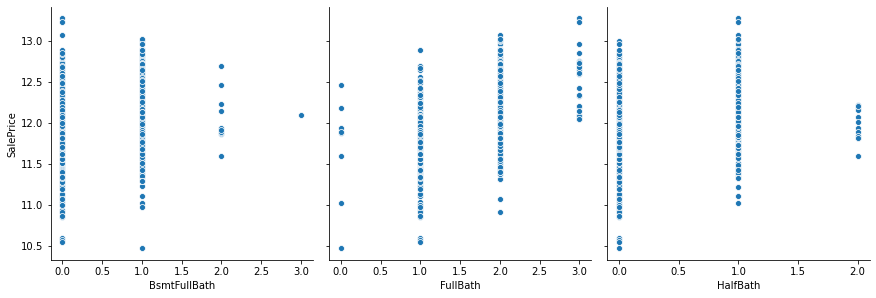

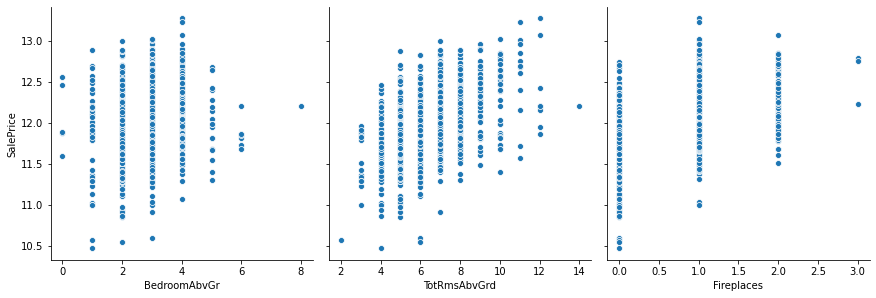

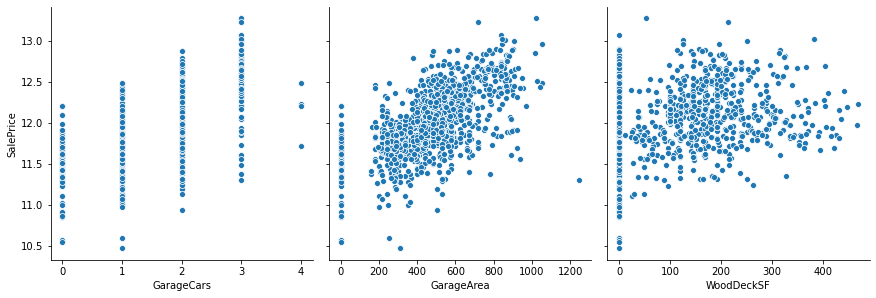

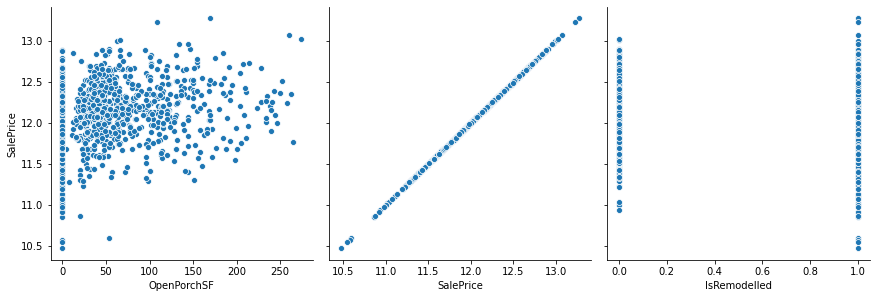

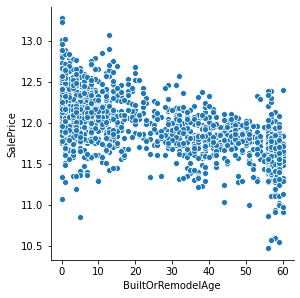

In [89]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

We can understood the correlation during further analysis

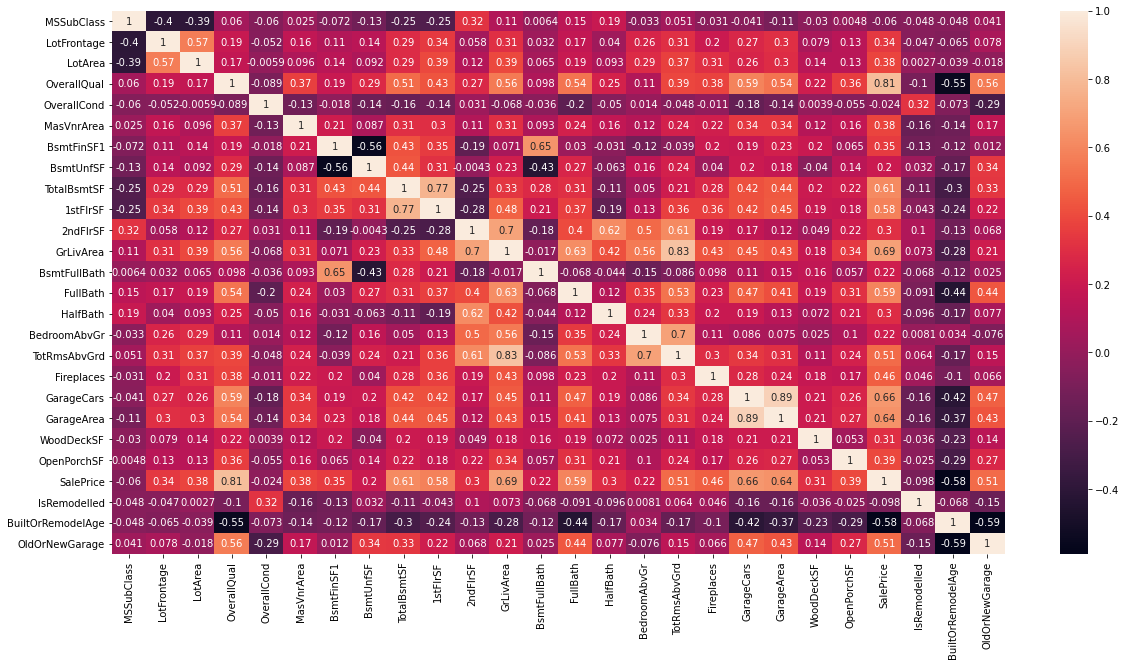

In [91]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing_df.corr(), annot = True)
plt.show()

We wil remove following columns which shows high correlation

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [92]:
# Removing the highly correlated variables

housing_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [93]:
housing_df.shape

(1358, 46)

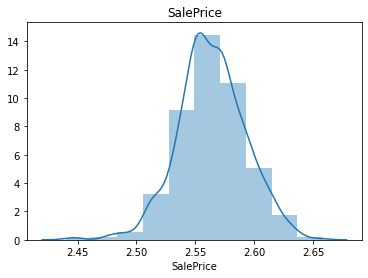

In [94]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing_df['SalePrice'] = np.log1p(housing_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_df['SalePrice'], bins=10)
plt.show()

The target value seems to be normally distrbuted

#### Converting categorical to dummy variables or mapping numeric ordered labels for Model preparation

In [95]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_df['d_LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_df['d_ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df['d_BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df['d_BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_df['d_HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df['d_GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_df['d_BldgType'] = housing_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_df['d_HouseStyle'] = housing_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_df['d_Fence'] = housing_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_df['d_LotConfig'] = housing_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_df['d_MasVnrType'] = housing_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_df['d_SaleCondition'] = housing_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [96]:
# drop the old columns from which the new columns were derived

housing_df = housing_df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [97]:
# For the following columns create dummies

d_MSZoning = pd.get_dummies(housing_df['MSZoning'], prefix='MSZoning', drop_first = True)
housing_df = pd.concat([housing_df, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(housing_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_df = pd.concat([housing_df, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(housing_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_df = pd.concat([housing_df, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(housing_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(housing_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(housing_df['Foundation'], prefix='Foundation', drop_first = True)
housing_df = pd.concat([housing_df, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(housing_df['GarageType'], prefix='GarageType', drop_first = True)
housing_df = pd.concat([housing_df, d_GarageType], axis = 1)

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [98]:
# drop the below columns as we now have new columns derived from these columns

housing_df = housing_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [99]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All Categorical variables rightly mapped or converted to Numerics Cols

 ### Model Building

#### Splitting data into Train and Test

In [100]:
# Putting all feature variable to X

X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [101]:
# Putting response variable to y

y = housing_df['SalePrice']
y.head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

#### Scaling the Features

In [102]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [104]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

#### Recursive feature elimination (RFE) -- Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new features for further analysis

In [105]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)


In [106]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,1stFlrSF,True,1
7,2ndFlrSF,True,1
8,GrLivArea,True,1
9,BsmtFullBath,True,1


In [107]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [108]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

#### Ridge Model

In [109]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,6.0,-0.006052,-0.006537,1
18,7.0,-0.006056,-0.006538,2
19,8.0,-0.006060,-0.006538,3
16,5.0,-0.006048,-0.006539,4
20,9.0,-0.006063,-0.006539,5
21,10.0,-0.006067,-0.006540,6
15,4.0,-0.006045,-0.006544,7
22,20,-0.006090,-0.006546,8
14,3.0,-0.006042,-0.006550,9
13,2.0,-0.006038,-0.006558,10


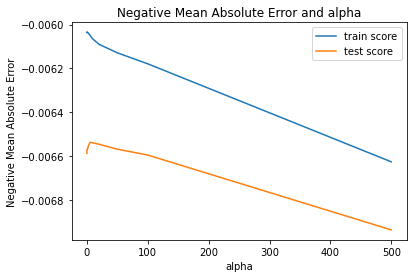

In [111]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [112]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
# check the coefficient values with lambda = 6

alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00025527,  0.00170549,  0.00523282,  0.00366022,  0.00241644,
        0.00337371,  0.00130915,  0.00099502,  0.0065305 ,  0.00095925,
        0.00082193,  0.00154577,  0.00164675,  0.00278638,  0.00076202,
       -0.00102419, -0.0013983 ,  0.00111117,  0.001062  ,  0.00123071,
        0.00152509,  0.0011865 ,  0.00119945, -0.00120851,  0.00115382,
        0.0053295 ,  0.00214749,  0.00833378,  0.00602533,  0.00197316,
       -0.0008875 , -0.00069152,  0.00160539, -0.00116664, -0.00070939,
        0.00128104, -0.00077709, -0.00095091,  0.00087042, -0.00299837,
       -0.00242828,  0.00077529, -0.0012483 ,  0.00256172,  0.00156604,
        0.00170046,  0.00341085,  0.00122968,  0.00055425, -0.00073772])

In [142]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

8.495181451624504e-05

In [143]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0003
1,LotArea,0.0017
2,OverallQual,0.0052
3,OverallCond,0.0037
4,BsmtFinSF1,0.0024
5,TotalBsmtSF,0.0034
6,1stFlrSF,0.0013
7,2ndFlrSF,0.0010
8,GrLivArea,0.0065
9,BsmtFullBath,0.0010


In [144]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0003,
 'LotArea': 0.0017,
 'OverallQual': 0.0052,
 'OverallCond': 0.0037,
 'BsmtFinSF1': 0.0024,
 'TotalBsmtSF': 0.0034,
 '1stFlrSF': 0.0013,
 '2ndFlrSF': 0.001,
 'GrLivArea': 0.0065,
 'BsmtFullBath': 0.001,
 'FullBath': 0.0008,
 'HalfBath': 0.0015,
 'Fireplaces': 0.0016,
 'GarageCars': 0.0028,
 'WoodDeckSF': 0.0008,
 'IsRemodelled': -0.001,
 'BuiltOrRemodelAge': -0.0014,
 'OldOrNewGarage': 0.0011,
 'd_BsmtQual': 0.0011,
 'd_BsmtExposure': 0.0012,
 'd_HeatingQC': 0.0015,
 'd_KitchenQual': 0.0012,
 'd_GarageFinish': 0.0012,
 'd_BldgType': -0.0012,
 'd_SaleCondition': 0.0012,
 'MSZoning_FV': 0.0053,
 'MSZoning_RH': 0.0021,
 'MSZoning_RL': 0.0083,
 'MSZoning_RM': 0.006,
 'Neighborhood_Crawfor': 0.002,
 'Neighborhood_Edwards': -0.0009,
 'Neighborhood_MeadowV': -0.0007,
 'Neighborhood_NridgHt': 0.0016,
 'Neighborhood_OldTown': -0.0012,
 'Neighborhood_SWISU': -0.0007,
 'Neighborhood_StoneBr': 0.0013,
 'Exterior1st_BrkComm': -0.0008,
 'Exterior1st_CemntBd': -0.001,
 'Exterio

#### RFE selection to minimise features to 15

In [145]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [146]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.0083
5,GrLivArea,True,1,0.0065
13,MSZoning_RM,True,1,0.0060
10,MSZoning_FV,True,1,0.0053
1,OverallQual,True,1,0.0052
2,OverallCond,True,1,0.0037
4,TotalBsmtSF,True,1,0.0034
14,Foundation_PConc,True,1,0.0034
7,GarageCars,True,1,0.0028
3,BsmtFinSF1,True,1,0.0024


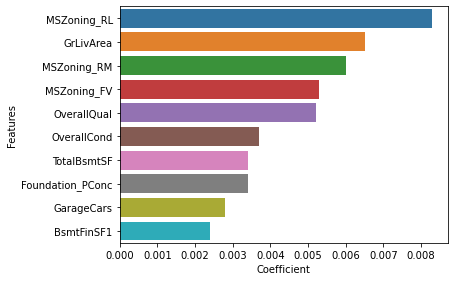

In [147]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = temp1_df)
plt.show()

##### The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

#### Lasso Model

In [148]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [149]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.006132,-0.006595,1
1,0.0002,-0.006209,-0.006647,2
2,0.0003,-0.006254,-0.006685,3
3,0.0004,-0.006309,-0.006724,4
4,0.0005,-0.006374,-0.006767,5
5,0.001,-0.006799,-0.007087,6
6,0.002,-0.007525,-0.007694,7
7,0.003,-0.008165,-0.008283,8
8,0.004,-0.008889,-0.008991,9
9,0.005,-0.009728,-0.009829,10


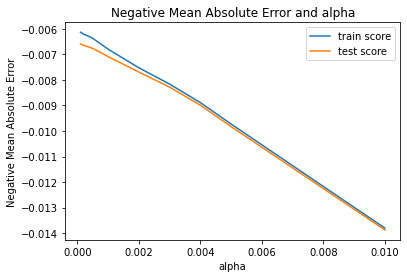

In [150]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [151]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00037251,  0.00158697,  0.00579857,  0.00369369,  0.00254747,
        0.00341128,  0.00054846,  0.        ,  0.0076331 ,  0.00082783,
        0.00061071,  0.00147185,  0.00171063,  0.00278848,  0.00072257,
       -0.0010553 , -0.00152952,  0.00086216,  0.00071452,  0.00116635,
        0.00139091,  0.0011486 ,  0.00120904, -0.00085039,  0.00123542,
        0.00313131,  0.00088446,  0.00417849,  0.00190248,  0.00179431,
       -0.00072867, -0.00055338,  0.00132426, -0.00096074, -0.00062269,
        0.00100805, -0.00070296, -0.        ,  0.00020059, -0.00012802,
       -0.00157257,  0.        , -0.00055193,  0.        ,  0.00062653,
        0.00087388,  0.00270384,  0.00084546,  0.00023775, -0.0007031 ])

In [153]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

8.318024453370303e-05

In [154]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0004
1,LotArea,0.0016
2,OverallQual,0.0058
3,OverallCond,0.0037
4,BsmtFinSF1,0.0025
5,TotalBsmtSF,0.0034
6,1stFlrSF,0.0005
7,GrLivArea,0.0076
8,BsmtFullBath,0.0008
9,FullBath,0.0006


In [155]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.00037251391809743726,
 'LotArea': 0.0015869746178794443,
 'OverallQual': 0.005798573382285287,
 'OverallCond': 0.0036936880209945343,
 'BsmtFinSF1': 0.0025474713995501854,
 'TotalBsmtSF': 0.0034112814849280035,
 '1stFlrSF': 0.0005484641834210717,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.007633103839602957,
 'BsmtFullBath': 0.0008278297664757732,
 'FullBath': 0.0006107115199287446,
 'HalfBath': 0.0014718454288278357,
 'Fireplaces': 0.0017106311703240192,
 'GarageCars': 0.002788478085903381,
 'WoodDeckSF': 0.0007225657980300068,
 'IsRemodelled': -0.0010552969803895003,
 'BuiltOrRemodelAge': -0.0015295199628814827,
 'OldOrNewGarage': 0.000862160656369345,
 'd_BsmtQual': 0.0007145176027489003,
 'd_BsmtExposure': 0.0011663462593932278,
 'd_HeatingQC': 0.0013909056112731725,
 'd_KitchenQual': 0.0011486009360319102,
 'd_GarageFinish': 0.0012090382901754541,
 'd_BldgType': -0.000850390842052162,
 'd_SaleCondition': 0.00123541582566766,
 'MSZoning_FV': 0.003131306468502249,
 'MSZonin

In [156]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [157]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.007633
1,OverallQual,True,1,0.005799
12,MSZoning_RL,True,1,0.004178
2,OverallCond,True,1,0.003694
4,TotalBsmtSF,True,1,0.003411
10,MSZoning_FV,True,1,0.003131
7,GarageCars,True,1,0.002788
14,Foundation_PConc,True,1,0.002704
3,BsmtFinSF1,True,1,0.002547
13,MSZoning_RM,True,1,0.001902


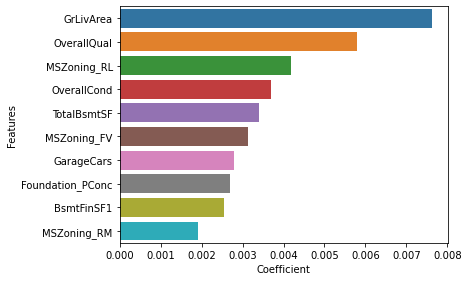

In [158]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = temp2_df)
plt.show()

##### The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

##### Final Insights:

***The optimal lambda value in case of Ridge and Lasso is as below:
Ridge - 6
Lasso - 0.0001***

***The Mean Squared Error of Lasso is slightly lower than that of Ridge***

***Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.***

***Hence based on Lasso, the factors that generally affect the price are the Living area square feet, Overall quality and condition of the house, Zoning classification, Total square feet of basement area, Floating Village Residential, Number of cars that can be accomodated in the garage, Poured Contrete Foundatonand the Basement finished square feet area***

***Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.***